In [9]:
import pandas as pd

url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"

df = pd.read_csv(url, index_col = 0)
"""
1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
"""   ## ++ . or 특정장르가 꾸준히 인기. or Year에 따라 변화하는 추이에 따라 (Genre, Platform) 설정.  // >> ~지역에서는 ~장르가 인기가 많다. 을 집중적으로 공략해야 한다
##근데 사실 이해하기에는 그림(plot)으로 표현하는게 최곤데.(https://eda-ai-lab.tistory.com/13) : 이상치 확인 EDA
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [10]:
# df.EU_Sales.unique()    ##column 값들 대충보기.
#df.info()   ## null data는 불완전 하므로 다 지우기. ('0'이랑 다름. - n133)   
##but Year는 명확하지 않지만 판매량이 엄청난 게임회사가 있을 수도. 확인 필요.Genre도 마찬가지. 진짜 버려도 되는 데이터인지 설멸할 수 있어야 신뢰도 증가.
pd.DataFrame(df.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,271
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [11]:
# df = df.dropna(axis=0)
# df.info()

In [12]:
## K->M으로 단위변환 EDA
dfs = df.iloc[:,5:]   ## 나라별 sales

def toMil(data) :         ##시간날때 df['~'] = df['~'].apply(str)로 더간단화하기.
  if type(data) == str :
    if 'K' in data :
      data= data.replace('K','')
      data = float(data)*10**(-3)
    elif 'M' in data :
      data = data.replace('M','')
    else : data = data      ## 숫자형 data와 str형 data가 섞여있나..? (str제거 한다음 dtype 확인해보면 정확.) - 별로안중요.
  return data

for i in range(len(dfs.columns)):
  dfs.iloc[:,i] = dfs.iloc[:,i].apply(toMil)
  dfs.iloc[:,i] = dfs.iloc[:,i].apply(pd.to_numeric)

# dfs

In [13]:
df1 = df.iloc[:,0:4]
df1
df = pd.concat([df1,dfs],axis=1)    ## 합치기, merge로도 해보기.

dfg = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
dfg    ##value를 수치화해서 % barplot subplot으로 큰 순서대로 그려넣으면 좋을듯. ##약간의 공통된 경향이 있긴 한데 그걸 어떻게 수치화해서 보여줄지.

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65


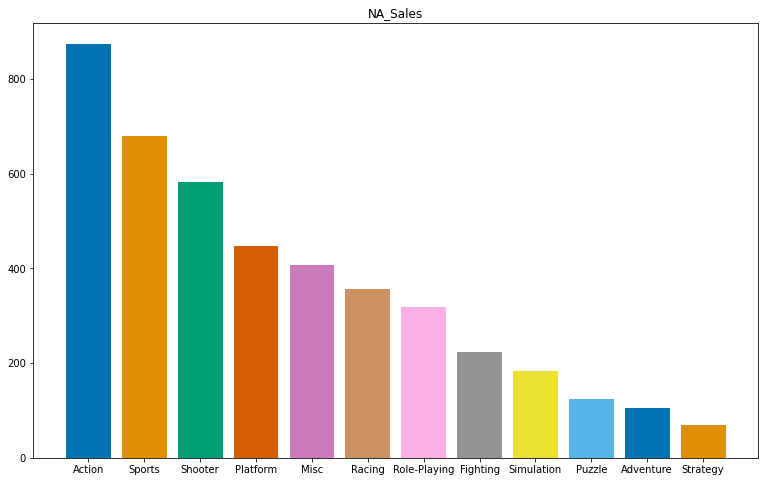

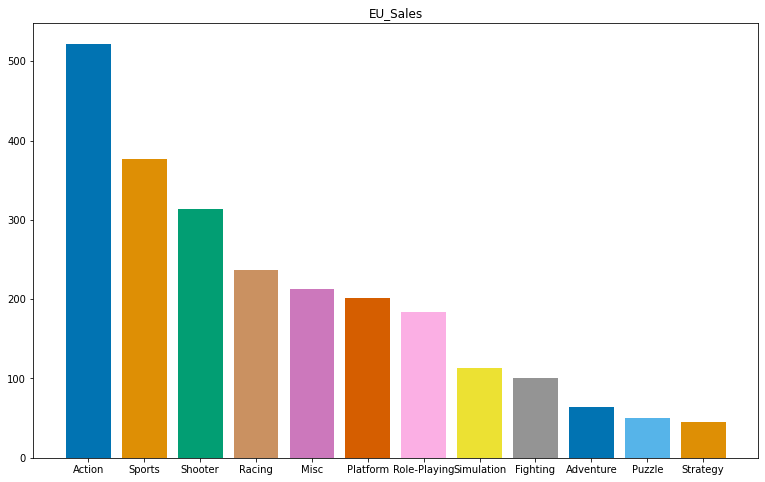

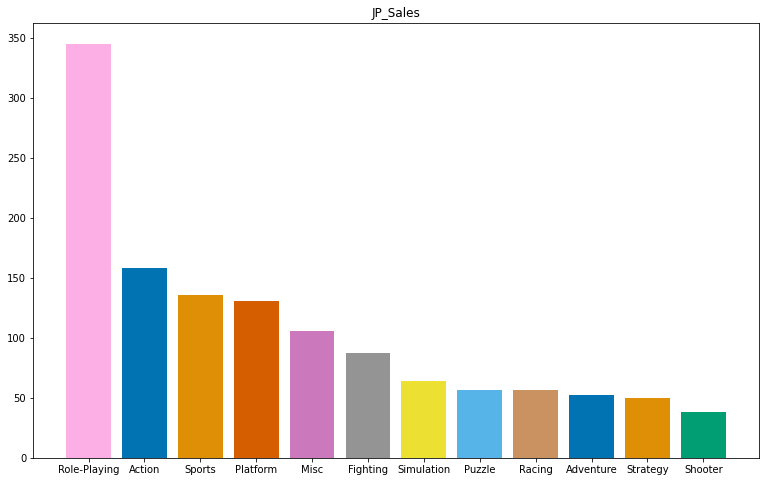

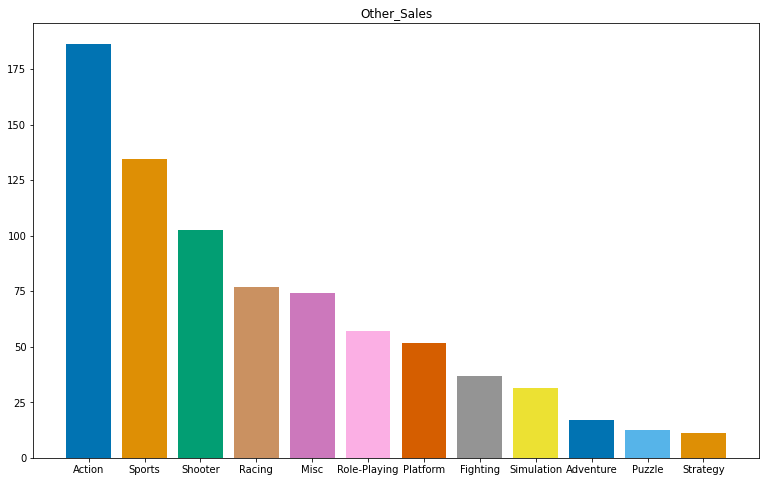

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

colors = sns.color_palette('colorblind',len(dfg.index)) ## Genre 색상 지정
dfg_sort = dfg.sort_values(by=dfg.columns[0], ascending=False)
dfg_sort['color'] = colors   ##Genre - color 지정.

for i in range(len(dfg.columns)):         ## 각 지역별 genre 순위 plot으로 그리기.
  fig, ax = plt.subplots(figsize=(13,8))      ## figsize
  ax.set_title(dfg.columns[i])
  dfNA = dfg_sort.sort_values(by=dfg.columns[i], ascending=False)     ##dfNA는 지역변수, dfEU, dfJP, dfOther...
  ax.bar(dfNA.index, dfNA[dfg.columns[i]], color=dfNA.color)
## Sales의 총합은 Action이 제일 많을 수도 있으나, game수로 나눌 경우 평균의 판매량은 다를 수 있다.
## 라고 생각했으나, 그냥 인기가 제일 많다.로 단순히 생각하는게 나을듯. 왜냐하면 아직은 판매수익까지 예측하는게 아니니까.

##bottom 위에 쌓아서 합친 bar plot 필요.

In [15]:
##1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
##가설 세우고 test, pvalue 검증. (t-test, chi-test, f-test)
##가설 : 지역에 따라서 선호하는 게임 장르는 같을 것이다.
##scaling 후 각 row값들이 일치하는지 확인. 신뢰구간 ~범위내
from sklearn.preprocessing import StandardScaler

dfg_scale = StandardScaler().fit_transform(dfg)
dfg_scale = pd.DataFrame(dfg_scale, index = dfg.index, columns=dfg.columns)      ## array->DF

dfg_scale

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,2.138325,2.307189,0.633451,2.355659
Adventure,-1.083730,-0.991550,-0.672568,-0.962499
Fighting,-0.591342,-0.723898,-0.236324,-0.574624
Misc,0.183015,0.076394,-0.015306,0.156920
Platform,0.343835,-0.001014,0.297547,-0.283375
Puzzle,-1.009625,-1.087465,-0.611921,-1.046411
Racing,-0.030043,0.254541,-0.617714,0.216774
Role-Playing,-0.187763,-0.130844,2.939171,-0.177165
Shooter,0.911376,0.801438,-0.841075,0.716532


In [16]:
dfg_scale   ## 각 값에 대해서 pvalue, 인기순위에 대해서 pvalue

dfg_scale

# stats.ttest_ind(tree1,tree2)
# dfg_scaleNA = dfg_scale.sort_values(by=dfg_scale.columns[0], ascending=False)
# dfg_scaleNA = dfg_scaleNA[0]

# dfg_scaleEU = dfg_scale.sort_values(by=dfg_scale.columns[1], ascending=False)
# dfg_scaleEU = 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,2.138325,2.307189,0.633451,2.355659
Adventure,-1.083730,-0.991550,-0.672568,-0.962499
Fighting,-0.591342,-0.723898,-0.236324,-0.574624
Misc,0.183015,0.076394,-0.015306,0.156920
Platform,0.343835,-0.001014,0.297547,-0.283375
Puzzle,-1.009625,-1.087465,-0.611921,-1.046411
Racing,-0.030043,0.254541,-0.617714,0.216774
Role-Playing,-0.187763,-0.130844,2.939171,-0.177165
Shooter,0.911376,0.801438,-0.841075,0.716532


In [17]:
# ## Year EDA
# # df.Year.unique()    ## 발표자료에 넣기. ~한 값들이 있더라. 네모로 해서. 전처리가 필요하다 의 근거. (96, 9, 6, 16,,,->19__ or 20__)

# def toYear(y) :
#   if y < 10 :
#     y = str(y)
#     y = '200'+y
#   elif (y>=10) & (y<50):
#     y = str(y)
#     y = '20'+y
#   elif (y>=50) & (y<1000):
#     y = str(y)
#     y = '19'+y
#   else : y = y
#   return y

# df['Year'] = df['Year'].apply(toYear)
# # df['Year'].unique()     ## 확인.


# dfy = df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
# dfy     ## year별로 각나라 전체 sales 추이 line 그래프로.

In [18]:
# ## 출고량이 제일 높은 게임에 대한 분석  ##1. genre, 2.Name
# # dfg['sum'] = dfg[,:].sum()
# dfg['sum'] = dfg.sum(axis=1)
# dfg = dfg.sort_values(by='sum', ascending=False)
# dfg     ##전체 출고량을 보면 Action > Sports > Shooter가 인기 있다. (%, 분산에 따라..?)

In [19]:
# ## 역대 가장 인기 있는 game
# dfs['sum'] = dfs.sum(axis=1)

# df2 = pd.concat([df1,dfs],axis=1)    ## df1 : sales제외한 df의 앞 column부분,   dfs : df의 sales부분
# df2 = df2.sort_values(by='sum' ,ascending=False)      ##intro로 이렇게 격차가 크다(출시게임을 설계하는게 중요하다 & 관심끌기)는 걸 보여주면 좋을듯.(++ 특정지역에서만 성공? or 한지역에서의 성공이 다른 지역에서도 성공을 보장하는지. 관련성파악하기.)
# df2[0:10]